# 電腦看得懂的字典： WordNet
網頁版：http://wordnetweb.princeton.edu/perl/webwn

官網教學：http://www.nltk.org/howto/wordnet.html

## 名詞解釋
Synset: 同義詞集合

Hypernym：上位詞，如「水果」為「蘋果」的上位詞

Hyponym：下位詞，如「蘋果」為「水果」的下位詞

In [1]:
### WordNet
import nltk
nltk.download("wordnet") # 下載英文 WordNet
nltk.download("omw") # 下載多語 WordNet
from nltk.corpus import wordnet as wn 

#同義詞、反義詞
good = wn.synset('good.a.01')
print("good 的定義： {}".format(good.definition()))
print("good 的例子： {}".format(good.examples()))
print("good 的同義詞： {}".format(good.lemmas()))
print("good 的反義詞： {}".format(good.lemmas()[0].antonyms()))

# 上位詞、下位詞
school = wn.synset('apple.n.01')
print("school的上位詞: {}".format(school.hypernyms()))
print("school的下位詞: {}".format(school.hyponyms()))

# 更多關係
tree = wn.synset('tree.n.01') # 樹
print("很多樹我們稱作什麼？ {}".format(tree.member_holonyms()))
body = wn.synset('body.n.01') # 樹
print("身體有哪些部位？ {}".format(body.part_meronyms()))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
good 的定義： having desirable or positive qualities especially those suitable for a thing specified
good 的例子： ['good news from the hospital', 'a good report card', 'when she was good she was very very good', 'a good knife is one good for cutting', 'this stump will make a good picnic table', 'a good check', 'a good joke', 'a good exterior paint', 'a good secretary', 'a good dress for the office']
good 的同義詞： [Lemma('good.a.01.good')]
good 的反義詞： [Lemma('bad.a.01.bad')]
school的上位詞: [Synset('edible_fruit.n.01'), Synset('pome.n.01')]
school的下位詞: [Synset('cooking_apple.n.01'), Synset('crab_apple.n.03'), Synset('eating_apple.n.01')]
很多樹我們稱作什麼？ [Synset('forest.n.01')]
身體有哪些部位？ [Synset('arm.n.01'), Synset('articulatory_system.n.01'), Synset('body_substance.n.01'), Synset('cavity.n.04'), Synset('c

## 斷詞系統：[CKIP Tagger](https://github.com/ckiplab/ckiptagger)

In [2]:
%%bash
pip install -U ckiptagger[tfgpu,gdown] rarfile

  Created wheel for rarfile: filename=rarfile-3.1-cp36-none-any.whl size=24908 sha256=13dc743f015eaf4f30203a0f65ba56cd995dae87ad14ce678a6e3e434e2b895f
  Stored in directory: /root/.cache/pip/wheels/23/3c/c8/0215b6a5079492eff3be3f545ae0b0c4a66734c35c9e444eac
Successfully built rarfile


In [3]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
data_utils.download_data_gdown("./")

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/data.zip
1.88GB [00:38, 48.8MB/s]


In [4]:
ws = WS("./data")
sentence_list = [
    "唯一支持韓國瑜",
    "唯一支持韓國瑜選總統",
    "唯一支持韓國輸",
    "讓韓國愉快不起來",
    "讓韓國瑜快不起來",
    "請把手放下",
    "全臺大停電",
    "全台大停電",
    "他把枕頭都給哭溼了",
    "國家機器動得很厲害",
    "網笑喊「小妹妹卡韓」 韓粉爸氣炸「還原」：為何黑韓？",
    "眾多韓粉傾巢而出",
    "很難過去",
    "我不難過",
    "世界12強賽中華隊12日晚間7點將與韓國隊交手，這場比賽要是輸了幾乎等於丟了奧運門漂，此戰中華隊派出旅日投手張奕對決韓國左投金廣鉉，有球迷力挺台灣，喊出「唯一支持韓國輸！」、「韓國愉快不起來」。",
    "12強賽韓國以0:7遭到完封，馬上成韓媒報導的焦點，韓聯社稱之為「對台灣的另一次失敗震驚了韓國的棒球」。"
]
word_sentence_list = ws(
    sentence_list,
    # sentence_segmentation=True, # To consider delimiters
    # segment_delimiter_set = {",", "。", ":", "?", "!", ";"}), # This is the defualt set of delimiters
    # recommend_dictionary = dictionary1, # words in this dictionary are encouraged
    # coerce_dictionary = dictionary2, # words in this dictionary are forced
)
print("一般模式：")
for word_sentence in word_sentence_list:
  print(word_sentence)

# 加上自訂詞典
word_to_weight = {
    "韓國瑜": 10000, #出現頻率
    "臺大": 100,
}
dictionary = construct_dictionary(word_to_weight)
word_sentence_list = ws(
    sentence_list,
    recommend_dictionary=dictionary # case 2 失效
    #coerce_dictionary=dictionary # 強迫抓出韓國瑜
)
print("\n自訂詞典：{}".format(word_to_weight))
for word_sentence in word_sentence_list:
  print(word_sentence)

一般模式：
['唯一', '支持', '韓國', '瑜']
['唯一', '支持', '韓國', '瑜選', '總統']
['唯一', '支持', '韓國', '輸']
['讓', '韓國', '愉快', '不', '起來']
['讓', '韓國瑜', '快', '不', '起來']
['請', '把', '手', '放下']
['全', '臺', '大', '停電']
['全', '台', '大', '停電']
['他', '把', '枕頭', '都', '給', '哭溼', '了']
['國家', '機器', '動', '得', '很', '厲害']
['網笑', '喊', '「', '小妹妹', '卡韓', '」', ' ', '韓粉爸', '氣炸', '「', '還原', '」', '：', '為何', '黑韓', '？']
['眾多', '韓粉', '傾巢而出']
['很', '難', '過去']
['我', '不', '難過']
['世界', '12', '強', '賽', '中華隊', '12日', '晚間', '7點', '將', '與', '韓國隊', '交手', '，', '這', '場', '比賽', '要是', '輸', '了', '幾乎', '等於', '丟', '了', '奧運', '門漂', '，', '此', '戰', '中華隊', '派出', '旅日', '投手', '張奕', '對決', '韓國', '左投', '金廣鉉', '，', '有', '球迷', '力挺', '台灣', '，', '喊出', '「', '唯一', '支持', '韓國', '輸', '！', '」', '、', '「', '韓國', '愉快', '不', '起來', '」', '。']
['12', '強', '賽', '韓國', '以', '0:7', '遭到', '完封', '，', '馬上', '成', '韓媒', '報導', '的', '焦點', '，', '韓聯社', '稱', '之為', '「', '對', '台灣', '的', '另', '一', '次', '失敗', '震驚', '了', '韓國', '的', '棒球', '」', '。']

自訂詞典：{'韓國瑜': 10000, '臺大': 100}
['唯一', '支持', '韓國瑜'

## 詞向量：Word2Vec
來源：https://github.com/music1353/Wikipedia-word2vec

In [5]:
from gensim.models import word2vec
def download_data_gdown(path):
    import rarfile
    import gdown
    import os
    
    file_id = "1WEHTrBbOnmdUyTz-Xy1yqlFvkLQuir8J"
    url = f"https://drive.google.com/uc?id={file_id}"
    #print(url)
    data_rar = os.path.join(path, "data.rar")
    gdown.download(url, data_rar, quiet=False)
    
    with rarfile.RarFile(data_rar, "r") as rar_ref:
        rar_ref.extractall(path)
    return

#下載資料
download_data_gdown('./')

#載入模型
word2vec_model = word2vec.Word2Vec.load("./20171201wiki_model.bin")

Downloading...
From: https://drive.google.com/uc?id=1WEHTrBbOnmdUyTz-Xy1yqlFvkLQuir8J
To: /content/data.rar
1.45GB [00:26, 55.3MB/s]
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## 玩玩看：找尋相似詞

In [6]:
query = "臺灣"
print('相似詞前十排序')
res = word2vec_model.most_similar(query, topn=10)

for item in res:
    print(item[0] +','+ str(item[1]))

相似詞前十排序


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


臺灣地區,0.6591618657112122
臺灣人,0.641158401966095
全臺,0.588318407535553
澎湖,0.56794673204422
臺北,0.5559974908828735
臺南,0.5386111736297607
臺語,0.5234870314598083
中國,0.5208361148834229
中國時報,0.5111610889434814
金門,0.5096668601036072


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## 玩玩看：做類比推理

In [7]:
q_list = ["英國", "日本", "紅茶"]
print("%s之於%s，如%s之於" % (q_list[0], q_list[1], q_list[2]))
res = word2vec_model.most_similar(positive=[q_list[1], q_list[2]], negative=[q_list[0]], topn=10, restrict_vocab=10000)
print("V({}) = [V({}) - V({})] + V({})".format(res[0][0], q_list[2], q_list[0], q_list[1]))
for item in res:
    print(item[0] +","+ str(item[1]))

英國之於日本，如紅茶之於
V(料理) = [V(紅茶) - V(英國)] + V(日本)
料理,0.5657322406768799
茶,0.5616065263748169
咖啡,0.5125634074211121
飲料,0.5043770670890808
水果,0.49565017223358154
味,0.4781525135040283
飯,0.4772951602935791
蔬菜,0.4666981101036072
關西,0.4654279351234436
牛奶,0.45767754316329956


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### 這份程式碼也可以用GPU進行加速。
### 於上面選單點選 "Runtime" -> "Change runtime type", 點選 "Hardware Accelerator" -> "GPU" ---- 別忘記點 "SAVE" 儲存噢！

----------------------------------------------------------------------

# BERT (Bidirectional Encoder Representations from Transformer)
*這份程式碼是基於新創公司HuggingFace在PyTorch Hub 的Colab Notebook所改編而成的，*
*原始的版本已經有克漏字與下句預測模型的demo，我們再加上多義詞的視覺化，特別在此感謝HuggingFace！*

**Bidirectional Encoder Representations from Transformers.**

_ | _
- | -
![alt](https://pytorch.org/assets/images/bert1.png) | ![alt](https://pytorch.org/assets/images/bert2.png)


### 使用到的模組

BERT 論文連結：[BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)

Transformer 論文連結：[Attention Is All You Need](https://arxiv.org/abs/1706.03762) 

 今天將會介紹的[Google訓練好的模型](https://github.com/google-research/bert) 包括：
- `bertTokenizer`: 將輸入的文字進行簡單的斷詞。
- `bertModel`: 訓練好的BERT模型。
- `bertForMaskedLM`: 訓練好的BERT克漏字模型。
- `bertForNextSentencePrediction`: 訓練好的BERT下句預測模型。

### 系統需求

BERT需要安裝一些額外的系統套件。點擊左方的play鍵來安裝吧！

In [8]:
%%bash
pip install tqdm boto3 requests regex sacremoses sentencepiece


  Created wheel for regex: filename=regex-2019.12.9-cp36-cp36m-linux_x86_64.whl size=609187 sha256=b231c4464bd2ac8f54f2391a1c3d98ce7700525ee9a5c660a0ece99de27f3cd2
  Stored in directory: /root/.cache/pip/wheels/0d/fb/b3/a89169557229468c49ca64f6839418f22461f6ee0a74f342b1
  Created wheel for sacremoses: filename=sacremoses-0.0.35-cp36-none-any.whl size=883999 sha256=165f5f4ad75cb2e5e37ee9c1796f16b3ec91df92de4f2bed8fc4a1ab97c453e2
  Stored in directory: /root/.cache/pip/wheels/63/2a/db/63e2909042c634ef551d0d9ac825b2b0b32dede4a6d87ddc94
Successfully built regex sacremoses


### 將句子編碼成BERT看得懂的形式

In [9]:
import torch # 載入PyTorch
tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-chinese', do_basic_tokenize=True) # 將放在雲端上面的分字器(tokenizer)下載下來
# Tokenized input
def preprocess_two_sents(first_sent, second_sent, tokenizer=tokenizer):
    text = "".join(["[CLS]", first_sent, "[SEP]", second_sent, "[SEP]"]) # "[CLS] 醒醒吧，[SEP] 發大財。[SEP]" [SEP]: 告訴模型[SEP]前後屬於不同的句子
    tokenized_text = tokenizer.tokenize(text) # 用分字器進行簡單的分字： ['[CLS]', '醒', '醒', '吧', '，', '[SEP]', '發', '大', '財', '。', '[SEP]']
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text) # 將每個字編碼成BERT內部的編號(每個字都有一個專屬的編號) [101, 7008, 7008, 1416, 8024, 102, 4634, 1920, 6512, 511, 102] 
    tokens_tensor = torch.tensor([indexed_tokens]) # 將編號們轉成PyTorch看得懂的向量

    # 告訴BERT哪一個字屬於哪一句(0代表第一句，1代表第二句)
    sep_index = tokenizer.convert_tokens_to_ids(["[SEP]"])[0]
    first_sent_len = indexed_tokens.index(sep_index) + 1
    # [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
    segments_ids = [0] * first_sent_len + [1] * (len(indexed_tokens) - first_sent_len)
    segments_tensors = torch.tensor([segments_ids])

    return tokens_tensor, segments_tensors

first_sent = "醒醒吧，" # 第一句話
second_sent = "計算考慮上下文的字向量。" # 第二句話
tokens_tensor, segments_tensors = preprocess_two_sents(first_sent, second_sent)

print("句子裡每個字的編號組成的向量： {}".format(tokens_tensor))
print("句子裡每個字屬於哪句話的向量： {}".format(segments_tensors))


Downloading: "https://github.com/huggingface/pytorch-transformers/archive/master.zip" to /root/.cache/torch/hub/master.zip



句子裡每個字的編號組成的向量： tensor([[ 101, 7008, 7008, 1416, 8024,  102, 6243, 5050, 5440, 2719,  677,  678,
         3152, 4638, 2099, 1403, 7030,  511,  102]])
句子裡每個字屬於哪句話的向量： tensor([[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [10]:
### 計算考慮上下文的字向量

model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-chinese')    # 將放在雲端上面的BERT模型下載下來
model.eval() # 將模型設爲預測模式

with torch.no_grad(): # 請模型不要計算訓練時會用到的梯度(gradient)，減少記憶體用量及加快計算速度
    encoded_layers, pooled_layers = model(tokens_tensor, segments_tensors) # 將句子編碼而成的向量傳入BERT模型，得到考慮上下文的字向量
print(encoded_layers.size()) # [句子數量，字數量，字向量長度]
print(pooled_layers.size()) # AVG(BERT(醒)，BERT(醒)，BERT(吧)，BERT(，)，BERT(發)，BERT(大)，BERT(財)，BERT(。))


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_master



torch.Size([1, 19, 768])
torch.Size([1, 768])


In [0]:
### BERT克漏字模型

def preprocess(sent, masked_indices=None): # 將句子編碼成編號向量，順便用[MASK]遮住我們想考BERT的字
    text = "[CLS]" + sent + "[SEP]"
    tokenized_text = tokenizer.tokenize(text)
    masked_tokens = []
    if masked_indices is not None:
        for masked_index in masked_indices:
            print("tokenized_text before masking: {}".format(tokenized_text))
            masked_tokens.append(tokenized_text[masked_index])
            tokenized_text[masked_index] = '[MASK]'
            print("tokenized_text after masking: {}".format(tokenized_text))

    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_ids = [0] * len(tokenized_text)
    segments_tensors = torch.tensor([segments_ids])
    if masked_indices is not None:
      return masked_tokens, tokens_tensor, segments_tensors
    else:
      return tokens_tensor, segments_tensors



In [24]:
import numpy as np

arr = np.array([1, 3, 2, 4, 5])

print( arr.argsort() )


[0 2 1 3 4]


In [44]:
sent = "今天買了平果來吃"
for i in range(1,len(sent)):
  masked_indices = [i] # 要遮住第幾個字？
  # masked_token: 被遮住的字，tokens_tensor: 句子裡每個字的編號組成的向量，segments_tensor: 句子裡每個字屬於哪句話的向量
  masked_tokens, tokens_tensor, segments_tensors = preprocess(sent, masked_indices)

  maskedLM_model = torch.hub.load('huggingface/pytorch-transformers', 'modelWithLMHead', 'bert-base-chinese')    # Download model and configuration from S3 and cache.
  maskedLM_model.eval() # 將模型設爲預測模式

  with torch.no_grad(): # 請模型不要計算訓練時會用到的梯度(gradient)，減少記憶體用量及加快計算速度
    predictions = maskedLM_model(tokens_tensor, segments_tensors) # 將句子編碼而成的向量傳入BERT克漏字模型，得到每個字的

  # Get the predicted token
  
  print(predictions[0][0].size())
  predicted_indices = torch.argmax(predictions[0][0], dim=-1)
  print(predicted_indices)
  
  predicted_tokens = tokenizer.convert_ids_to_tokens(predicted_indices[masked_indices].tolist())
  print("原字：{}; 模型預測：{}".format(masked_tokens, predicted_tokens))
  print()

tokenized_text before masking: ['[CLS]', '今', '天', '買', '了', '平', '果', '來', '吃', '[SEP]']
tokenized_text after masking: ['[CLS]', '[MASK]', '天', '買', '了', '平', '果', '來', '吃', '[SEP]']


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_master


torch.Size([10, 21128])
tensor([8024, 7392, 1921, 6525,  749, 2398, 3362,  889,  511,  511])
原字：['今']; 模型預測：['隔']

tokenized_text before masking: ['[CLS]', '今', '天', '買', '了', '平', '果', '來', '吃', '[SEP]']
tokenized_text after masking: ['[CLS]', '今', '[MASK]', '買', '了', '平', '果', '來', '吃', '[SEP]']


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_master


torch.Size([10, 21128])
tensor([8024,  511, 1921, 6525,  749, 2398, 3362,  889,  511,  511])
原字：['天']; 模型預測：['天']

tokenized_text before masking: ['[CLS]', '今', '天', '買', '了', '平', '果', '來', '吃', '[SEP]']
tokenized_text after masking: ['[CLS]', '今', '天', '[MASK]', '了', '平', '果', '來', '吃', '[SEP]']


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_master


torch.Size([10, 21128])
tensor([8024,  511, 1921, 6525,  749, 2398, 3362,  889,  511,  511])
原字：['買']; 模型預測：['買']

tokenized_text before masking: ['[CLS]', '今', '天', '買', '了', '平', '果', '來', '吃', '[SEP]']
tokenized_text after masking: ['[CLS]', '今', '天', '買', '[MASK]', '平', '果', '來', '吃', '[SEP]']


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_master


torch.Size([10, 21128])
tensor([8024,  511, 1921, 6525,  749, 2398, 3362,  889, 1391,  511])
原字：['了']; 模型預測：['了']

tokenized_text before masking: ['[CLS]', '今', '天', '買', '了', '平', '果', '來', '吃', '[SEP]']
tokenized_text after masking: ['[CLS]', '今', '天', '買', '了', '[MASK]', '果', '來', '吃', '[SEP]']


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_master


torch.Size([10, 21128])
tensor([8024,  511, 1921, 6525,  749, 5981, 3362,  889,  511,  511])
原字：['平']; 模型預測：['蘋']

tokenized_text before masking: ['[CLS]', '今', '天', '買', '了', '平', '果', '來', '吃', '[SEP]']
tokenized_text after masking: ['[CLS]', '今', '天', '買', '了', '平', '[MASK]', '來', '吃', '[SEP]']


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_master


torch.Size([10, 21128])
tensor([8024,  511, 1921, 6525,  749, 2398, 1019,  889,  511,  511])
原字：['果']; 模型預測：['價']

tokenized_text before masking: ['[CLS]', '今', '天', '買', '了', '平', '果', '來', '吃', '[SEP]']
tokenized_text after masking: ['[CLS]', '今', '天', '買', '了', '平', '果', '[MASK]', '吃', '[SEP]']


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_master


torch.Size([10, 21128])
tensor([8024,  511, 1921, 6525,  749, 2398, 3362,  889,  511,  511])
原字：['來']; 模型預測：['來']



--2019-11-16 06:57:03--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M   226MB/s    in 0.5s    

2019-11-16 06:57:04 (226 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKtc-Black.otf  
  inflating: NotoSansCJKtc-Bold.otf  
  inflating: NotoSansCJKtc-DemiLight.otf  
  inflating: NotoSansCJKtc-Light.otf  
  inflating: NotoSansCJKtc-Medium.otf  
  inflating: NotoSansCJKtc-Regular.otf  
  inflating: NotoSansCJKtc-Thin

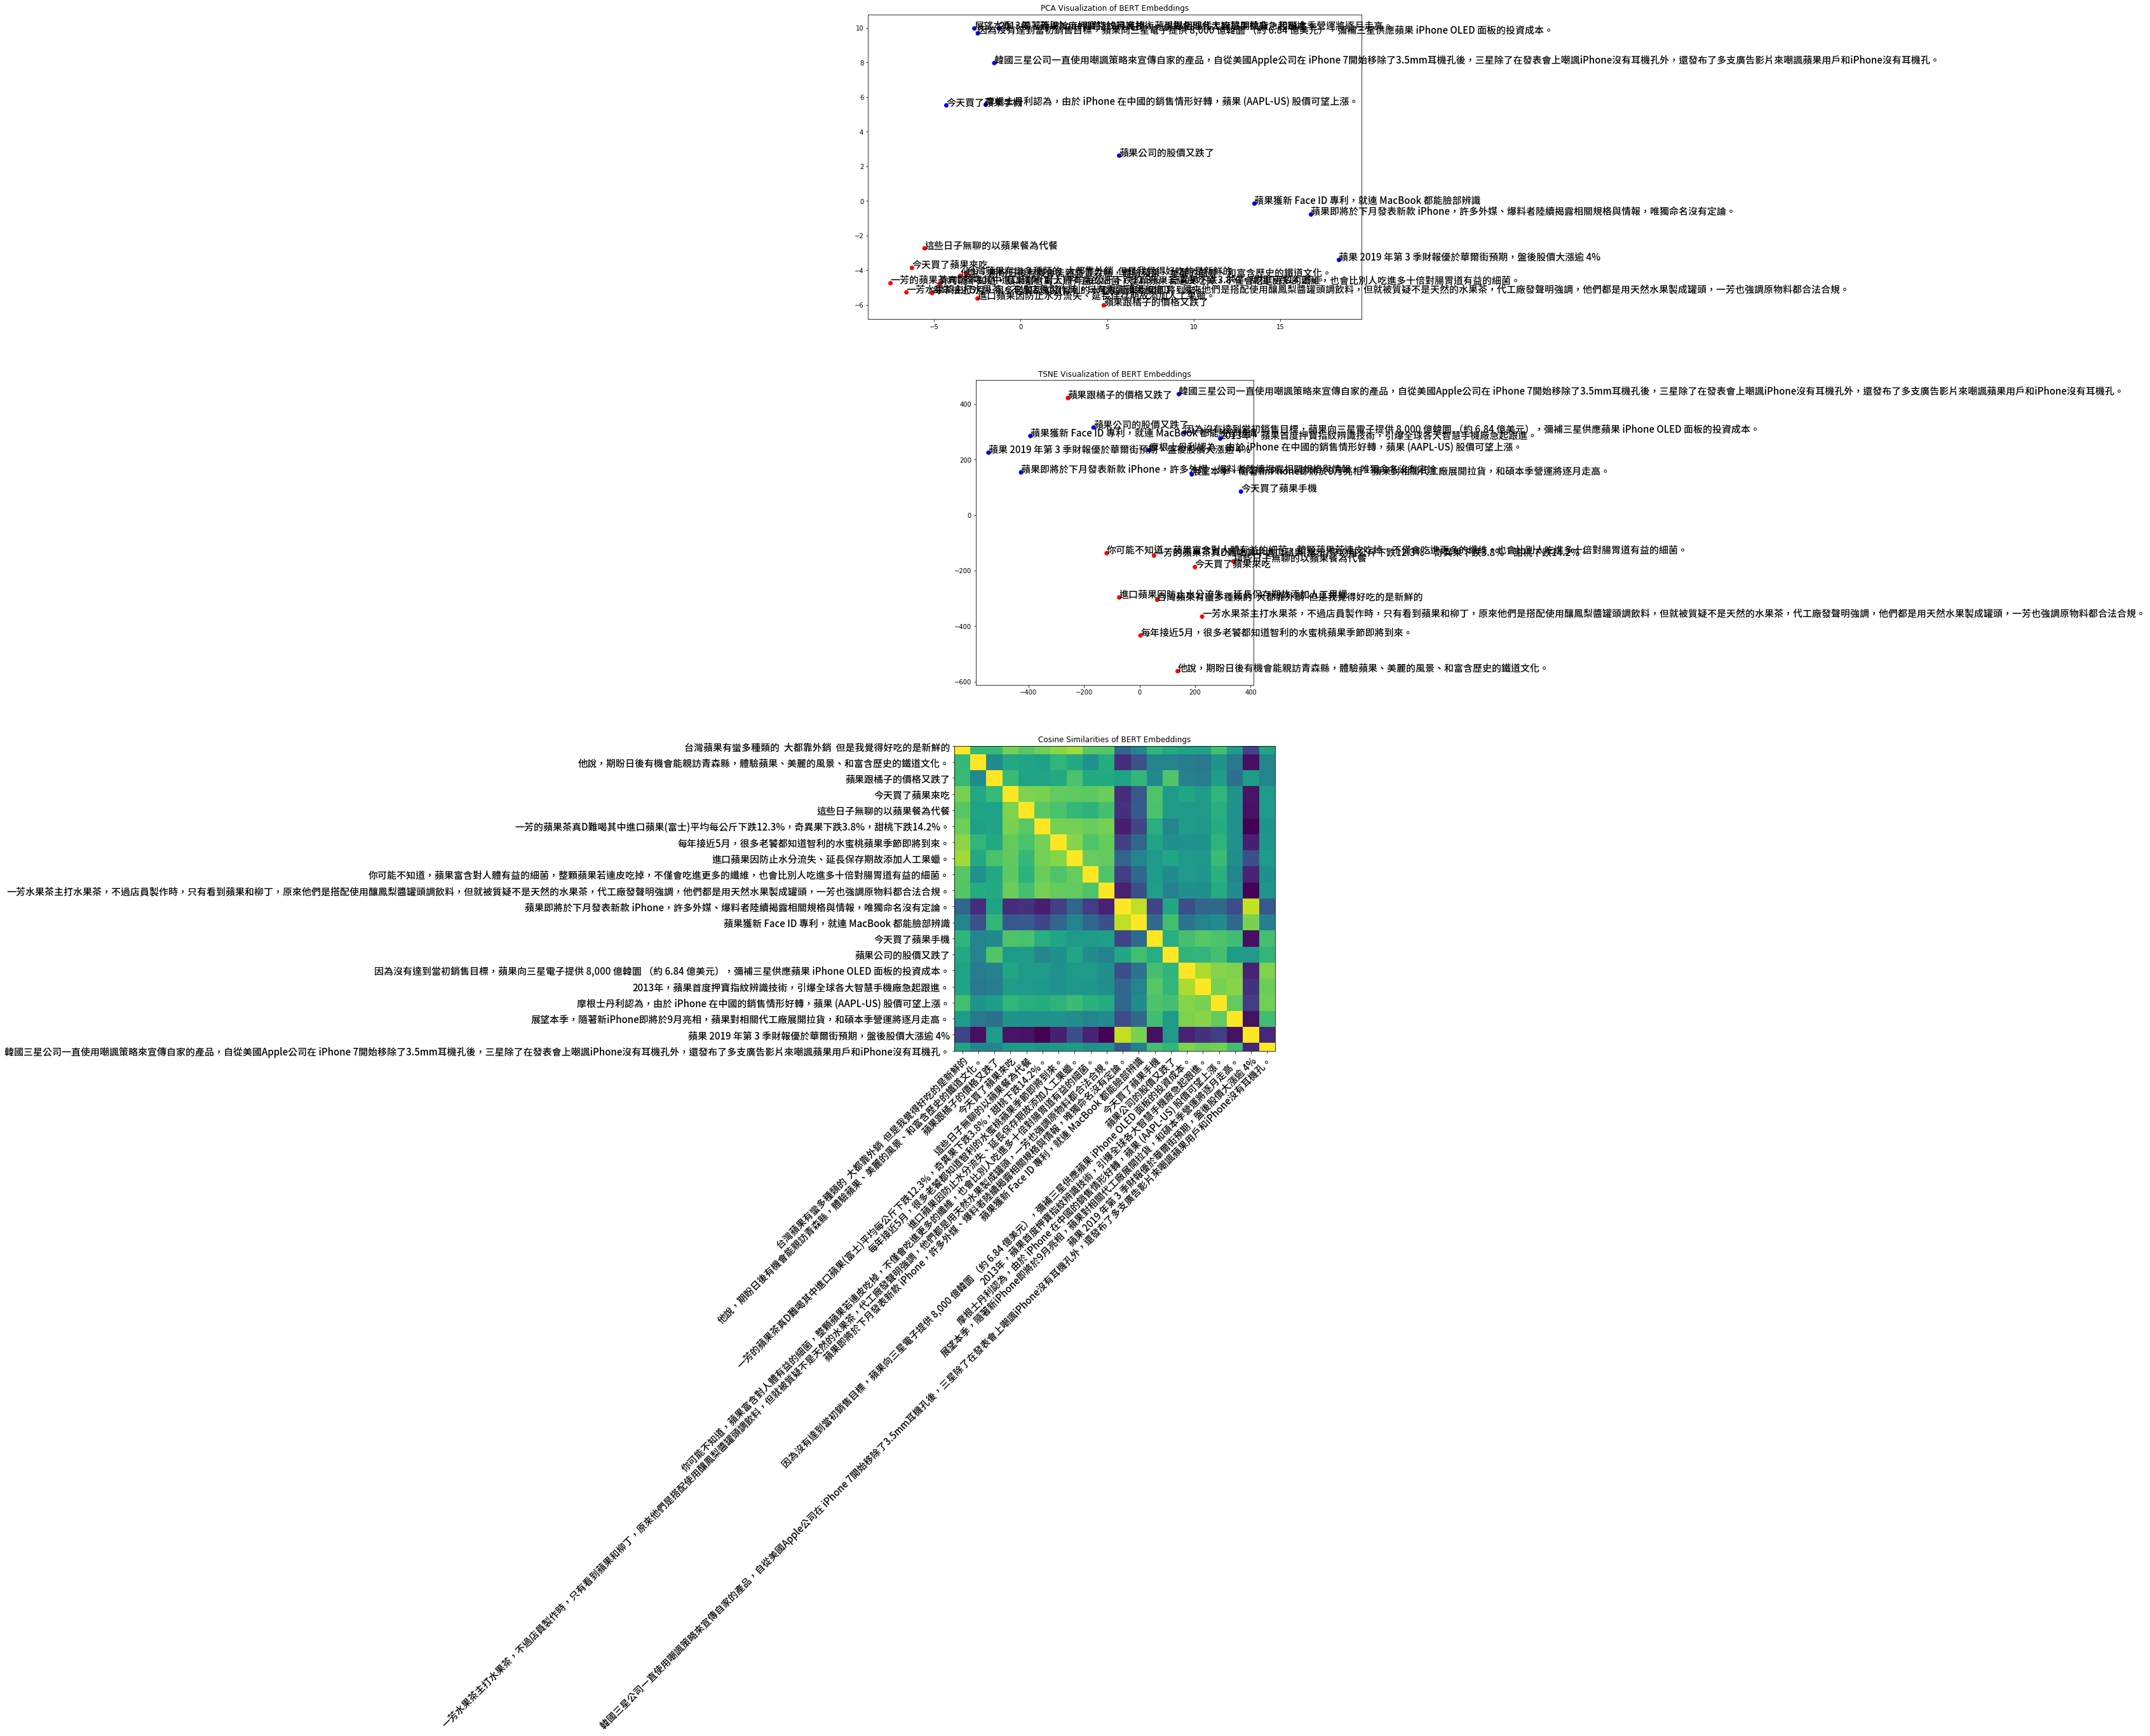

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import torch.nn.functional as F


def preprocess(sent, masked_indices=None): # 將句子編碼成編號向量，順便用[MASK]遮住我們想考BERT的字
    text = "[CLS]" + sent + "[SEP]"
    tokenized_text = tokenizer.tokenize(text)
    masked_tokens = []
    if masked_indices is not None:
        for masked_index in masked_indices:
            print("tokenized_text before masking: {}".format(tokenized_text))
            masked_tokens.append(tokenized_text[masked_index])
            tokenized_text[masked_index] = '[MASK]'
            print("tokenized_text after masking: {}".format(tokenized_text))

    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_ids = [0] * len(tokenized_text)
    segments_tensors = torch.tensor([segments_ids])
    if masked_indices is not None:
      return masked_tokens, tokens_tensor, segments_tensors
    else:
      return tokens_tensor, segments_tensors

# 下載中文字型
# !wget https://github.com/victorgau/PyConTW2018Talk/raw/master/modules/simhei.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
# matplotlib.font_manager._rebuild()
# matplotlib.rc('font', family='simhei')
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip"
!unzip "NotoSansCJKtc-hinted.zip"
!mv NotoSansCJKtc-Medium.otf /usr/share/fonts/truetype/
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/NotoSansCJKtc-Medium.otf'
fontprop = fm.FontProperties(fname=path, size= 15)
#matplotlib.rcParams['font.sans-serif'] = ['Noto Sans CJK TC', 'sans-serif']

# 蘋果作爲一個水果
apple_1_sents = ["台灣蘋果有蠻多種類的  大都靠外銷  但是我覺得好吃的是新鮮的",
                 "他說，期盼日後有機會能親訪青森縣，體驗蘋果、美麗的風景、和富含歷史的鐵道文化。",
                 "蘋果跟橘子的價格又跌了",
                 "今天買了蘋果來吃",
                 "這些日子無聊的以蘋果餐為代餐",
                 "一芳的蘋果茶真D難喝"
                 "其中進口蘋果(富士)平均每公斤下跌12.3%，奇異果下跌3.8%，甜桃下跌14.2%。",
                 "每年接近5月，很多老饕都知道智利的水蜜桃蘋果季節即將到來。",
                 "進口蘋果因防止水分流失、延長保存期故添加人工果蠟。",
                 "你可能不知道，蘋果富含對人體有益的細菌，整顆蘋果若連皮吃掉，不僅會吃進更多的纖維，也會比別人吃進多十倍對腸胃道有益的細菌。",
                 "一芳水果茶主打水果茶，不過店員製作時，只有看到蘋果和柳丁，原來他們是搭配使用釀鳳梨醬罐頭調飲料，但就被質疑不是天然的水果茶，"
                  "代工廠發聲明強調，他們都是用天然水果製成罐頭，一芳也強調原物料都合法合規。"]

# 蘋果作爲一家公司
apple_2_sents = ["蘋果即將於下月發表新款 iPhone，許多外媒、爆料者陸續揭露相關規格與情報，唯獨命名沒有定論。",
                 "蘋果獲新 Face ID 專利，就連 MacBook 都能臉部辨識",
                 "今天買了蘋果手機",
                 "蘋果公司的股價又跌了",
                 "因為沒有達到當初銷售目標，蘋果向三星電子提供 8,000 億韓圜 （約 6.84 億美元），彌補三星供應蘋果 iPhone OLED 面板的投資成本。",
                 "2013年，蘋果首度押寶指紋辨識技術，引爆全球各大智慧手機廠急起跟進。",
                 "摩根士丹利認為，由於 iPhone 在中國的銷售情形好轉，蘋果 (AAPL-US) 股價可望上漲。",
                 "展望本季，隨著新iPhone即將於9月亮相，蘋果對相關代工廠展開拉貨，和碩本季營運將逐月走高。",
                 "蘋果 2019 年第 3 季財報優於華爾街預期，盤後股價大漲逾 4%",
                 "韓國三星公司一直使用嘲諷策略來宣傳自家的產品，自從美國Apple公司在 iPhone 7開始移除了3.5mm耳機孔後，"
                 "三星除了在發表會上嘲諷iPhone沒有耳機孔外，還發布了多支廣告影片來嘲諷蘋果用戶和iPhone沒有耳機孔。"]

apple_sents = apple_1_sents + apple_2_sents # 將兩種語意的句子list合併成一個大的list
with torch.no_grad(): # 請模型不要計算訓練時會用到的梯度(gradient)，減少記憶體用量及加快計算速度
    embeddings = [] #初始化BERT字向量的list
    keyword_index = tokenizer.convert_tokens_to_ids(["蘋"])[0] #拿取「果」這個字在BERT內部的編號
    for sent in apple_sents: # 對所有在上面的list裡面的句子都計算BERT的考慮上下文的字向量
        tokens_tensor, segments_tensors = preprocess(sent) # 把中文字轉換成BERT看得懂的編號向量
        encoded_layers, _ = model(tokens_tensor, segments_tensors) # 計算BERT字向量
        keyword_position = torch.nonzero(tokens_tensor[0] == keyword_index)[0][0] # 拿取句子裡第一次出現的「果」字在句子中的位置
        embeddings.append(encoded_layers[0, keyword_position]) # 拿取句子裡第一個「果」字的向量，並加入BERT字向量的list中

# 把有N個shape為(L,C)的PyTorch Tensor的List [tensor(L,C), tensor(L,C), ..., tensor(L,C)]變成單一個shape為(N, L, C)的 PyTorch Tensor(N, L, C)
embeddings = torch.stack(embeddings, dim=0) 

# 我們要畫三張圖，因此初始化一個三行一列的畫布
fig, axes = plt.subplots(3, 1, figsize=(30, 30))

# 每個BERT字向量都有768維，我們用TSNE演算法將他們降維到2維空間以便進行視覺化
tsne_embeddings = TSNE(n_components=2, perplexity=10.0).fit_transform(embeddings.numpy())

# 每個BERT字向量都有768維，我們用PCA演算法將他們降維到2維空間以便進行視覺化
pca=PCA(n_components=3) 
pca.fit(embeddings) 
pca_embeddings = pca.transform(embeddings)

# 為蘋果的不同意思上色
colors = ['r'] * len(apple_1_sents) + ['b'] * len(apple_2_sents)

#將PCA降維的結果畫在第一行的畫布上
axes[0].scatter(pca_embeddings[:,0], pca_embeddings[:,1], c=colors)

#把標題寫上去
axes[0].set_title("PCA Visualization of BERT Embeddings")
for i, txt in enumerate(apple_sents):
    #在每個點旁邊寫上「果」的字向量的所屬句子（上下文）
    axes[0].annotate(txt, (pca_embeddings[i,0], pca_embeddings[i,1]), fontproperties=fontprop)

#將TSNE降維的結果畫在第二行的畫布上
axes[1].scatter(tsne_embeddings[:,0], tsne_embeddings[:,1], c=colors)

#把標題寫上去
axes[1].set_title("TSNE Visualization of BERT Embeddings")
for i, txt in enumerate(apple_sents):
    #在每個點旁邊寫上「果」的字向量的所屬句子（上下文）
    axes[1].annotate(txt, (tsne_embeddings[i,0], tsne_embeddings[i,1]), fontproperties=fontprop)

#第三張圖：首先計算每個「果」的字向量之間的餘弦相似度(cosine similarity)
products = torch.matmul(embeddings, torch.transpose(embeddings, 1, 0))
norms = torch.sqrt(torch.sum(embeddings ** 2, dim=-1))
similarities = products / (norms.unsqueeze(0) * norms.unsqueeze(1))

#matplotlib套件不喜歡PyTorch Tensor，喜歡numpy array，所以我們讓他高興一點
similarities = similarities.numpy()

#將相似度畫在第三張圖上
im = axes[2].imshow(similarities)
axes[2].set_xticks(np.arange(len(apple_sents)))
axes[2].set_yticks(np.arange(len(apple_sents)))

#為每個行列標上所屬句子
axes[2].set_xticklabels(apple_sents, fontproperties=fontprop)
axes[2].set_yticklabels(apple_sents, fontproperties=fontprop)

#一些讓圖比較漂亮的設定
axes[0].set_aspect('equal', 'box')
axes[1].set_aspect('equal', 'box')
axes[2].set_aspect('equal', 'box')
plt.setp(axes[2].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
axes[2].set_title("Cosine Similarities of BERT Embeddings")
plt.show()


        

### Resources

 - Paper: [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)
 - Initial repository (with detailed examples and documentation): [pytorch-pretrained-BERT](https://github.com/huggingface/pytorch-pretrained-BERT)